## Prise en main

In [ ]:
x = 2434+33476
y = 1+3 

In [ ]:
x

In [ ]:
print(x)

In [ ]:
x
print(x)

In [ ]:
y

In [ ]:
y
print(x)

In [ ]:
print(y)
x

In [ ]:
print?

In [ ]:
print

In [38]:
import numpy as np
import scipy as sc
import matplotlib as mpl
import sklearn as skl
import time

# Exercices

## Exercice 1 : norme d'une liste
Ecrire une fonction Python qui calcule la norme Euclidienne d'un vecteur de dimension arbitraire définie sous forme de liste.

In [4]:
def normeEuclidienne(vect):
    ret = 0
    for i in range(len(vect)):
        ret += vect[i] * vect[i]
    return np.sqrt(ret)

In [11]:
vect = [12,8,4]
print("Norme du vecteur :",normeEuclidienne(vect))


Norme du vecteur : 14.966629547095765


Citez des avantages des listes en Python ? [A compléter]

1. Les listes sont dynamiques
2. On peut les remplir avec n'importe quoi
3. Elles sont simples à itérer

## Exercice 1bis : matrice Numpy

* Ecrire une méthode créant une matrice, sous forme de listes de listes, de taille prédéfinie, remplie aléatoirement.
* Ecrire un produit matrice/vecteur utilisant cette structure et basée sur une double boucle.
* Comparer le temps d'exécution (package time) de votre produit avec la même opération réalisée par Numpy.

In [ ]:
# Import de package 
import random  # https://docs.python.org/3.7/library/random.html
import time    # https://docs.python.org/3.7/library/time.html

In [24]:
def createMatRandom(low,high,sizeX,sizeY):
    return np.random.randint(low,high,(sizeX,sizeY))
def matVectProduct(mat,vect):
    ret = np.zeros(mat.shape[0])
    if(mat.shape[1] == len(vect)):
        for i in range(mat.shape[0]):
            sum = 0
            for j in range(mat.shape[1]):
                sum += mat[i][j] * vect[j]
            ret[i] = sum
        return ret
    else:
        return False

In [30]:
mat = createMatRandom(0,6,10,10)
vect = np.random.randint(0,9,10)
print(mat)
print(vect)
t1 = time.clock()
print("Product :",matVectProduct(mat,vect))
t2 = time.clock()
print("Time :",(t2-t1),"s")
t1 = time.clock()
print("Numpy prod :",mat.dot(vect))
t2 = time.clock()
print("Time numpy :",(t2-t1),"s")

[[4 0 5 1 0 3 2 2 0 1]
 [2 2 5 3 2 1 0 0 4 5]
 [3 5 0 0 1 3 3 0 1 0]
 [1 3 0 3 4 0 2 0 5 5]
 [1 1 1 1 4 0 3 2 4 1]
 [1 0 5 5 1 3 2 2 0 3]
 [3 1 4 5 4 4 4 4 4 3]
 [3 1 4 3 1 1 1 5 0 1]
 [4 0 3 0 3 2 5 5 3 5]
 [1 1 0 5 5 2 4 2 5 0]]
[0 5 5 5 3 1 0 7 7 2]
Product : [ 49.  95.  38.  87.  71.  76. 128.  81.  92.  96.]
Time : 0.0003284000000007836 s
Numpy prod : [ 49  95  38  87  71  76 128  81  92  96]
Time numpy : 0.00019840000004478497 s


Quel temps obtenez vous ? [A compléter]

Cas | $(m,n)$ | Boucle for | Solution Numpy
: | :-: | :-: | :-:
Cas 1 |(3,3) |0.0003 s |0.0002 s
Cas 2 |(100,100) |0.004 s |0.0002 s
Cas 3 |(1000,1000) |0.3 s |0.002 s

## Exercice 2 : pickle

* Définissez votre propre liste de chaînes de caractère (par exemple, une liste de villes de Bretagne).
* Utilisez le module ``pickle`` pour sauver cette liste dans un fichier texte : [Pickle](https://docs.python.org/3/library/pickle.html).
* Rechargez cette liste.
* Même chose avec un dictionnaire.

In [1]:
import pickle
villes = ["Vannes","Quimper","Lorient","Brest","Rennes","Saint-Malo"]
pickle.dump(villes, open('villes.txt', 'wb'))
villesLoad = pickle.load(open('villes.txt', 'rb'))
print(villesLoad)

['Vannes', 'Quimper', 'Lorient', 'Brest', 'Rennes', 'Saint-Malo']


In [13]:
villesDict = {
    "name1" : "Vannes",
    "name2" : "Quimper",
    "name3" : "Lorient",
    "name4" : "Brest",
    "name5" : "Rennes",
    "name6" : "Saint-Malo",
}
np.save("villes.npy", villesDict)
villesDictLoad = np.load("villes.npy", allow_pickle="True")
print(villesDictLoad.item())

{'name1': 'Vannes', 'name2': 'Quimper', 'name3': 'Lorient', 'name4': 'Brest', 'name5': 'Rennes', 'name6': 'Saint-Malo'}


## Exercice 3 : Classe

* Créer une classe Python nommée ``Vecteur``, que l'on utilisera pour décrire un vecteur plan. Ces paramètres sont ``x`` et ``y``.
* Implémenter l'addition ``__add__``, la soustraction ``__sub__``, les multiplications ``__mul__`` et ``__rmul__`` par un vecteur et un scalaire, et la représentation ``__repr__``. Ne pas oublier le constructeur ``__init__``.
* Créer une classe nommée ``Particule``, dont les paramètres sont les vecteurs position et vitesse. Implémenter une méthode ``deplace(dt)`` pour calculer la nouvelle position d'une particule après un pas de temps dt.

In [2]:
class Vecteur:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def __add__(self,otherVect):
        return Vecteur(self.x+otherVect.x, self.y+otherVect.y)
    def __sub__(self,otherVect):
        return Vecteur(self.x-otherVect.x, self.y-otherVect.y)
    def __mul__(self,otherVect):
        return Vecteur(self.x*otherVect.x, self.y*otherVect.y)
    def __rmul__(self,scalaire):
        return Vecteur(self.x*scalaire, self.y*scalaire)
    def __repr__(self):
        return "("+str(self.x)+","+str(self.y)+")"

In [3]:
class Particule:
    def __init__(self,vectPos,vectVit):
        self.vectPos = vectPos
        self.vectVit = vectVit
    def deplace(self,dt):
        self.vectPos = self.vectPos + (dt * self.vectVit)

Testez le bon fonctionnement de vos deux classes

In [6]:
vect1 = Vecteur(4,5)
vect2 = Vecteur(6,7)
print("Vecteur 1 :",vect1)
print("Vecteur 2 :",vect2)
print("Addition :",(vect1 + vect2))
print("Soustraction :",(vect1 - vect2))
print("Produit vectorielle :",(vect1 * vect2))
scalaire = 2
print("Produit de Vecteur1 par",scalaire,":",(scalaire*vect1))

particule = Particule(vect1,vect2)
print("Particule, vectPos :",particule.vectPos,", vectVit :",particule.vectVit)
dt = 3
particule.deplace(dt)
print("Deplacement avec dt =",dt,": vectPos =",particule.vectPos)

Vecteur 1 : (4,5)
Vecteur 2 : (6,7)
Addition : (10,12)
Soustraction : (-2,-2)
Produit vectorielle : (24,35)
Produit de Vecteur1 par 2 : (8,10)
Particule, vectPos : (4,5) , vectVit : (6,7)
Deplacement avec dt = 3 : vectPos = (22,26)


## Exercice 4 : Sympy

$$ I = \int_{-\infty}^{+\infty} e^{-x^2}dx$$

* Calculez l’intégrale suivante (dite de Gauss) en utilisant la méthode symbolique de [Sympy](https://docs.sympy.org/1.5.1/modules/integrals/integrals.html) 
* Calculez cette même intégrale numériquement en utilisant la méthode des trapèzes de numpy (i.e. ``numpy.trapz``) 
* Calculez une nouvelle fois la même intégrale avec une méthode de calcul équivalente que vous aurez codée.



In [47]:
from sympy import *
from mpmath import inf
import numpy as np

In [55]:
x = Symbol('x')
print("Avec Sympy :")
integrate(exp(-(x**2)),(x,-inf,+inf))
#quad(lambda x: exp(-(x**2)), [-inf, +inf])

Avec Sympy :


In [56]:
def gaussian(x):
    return np.exp(-(x**2))
x = np.arange(-10,10,0.1)
y = gaussian(x)
print("Avec numpy.trapz de -10 à 10 :",np.trapz(y,x))
#Environ sqrt(PI)

Avec numpy.trapz de -10 à 10 : 1.7724538509055159


In [66]:
def integrale(f,borneInf,borneSup,pas):
    x = np.arange(borneInf,borneSup,pas)
    y = f(x)
    ret = 0
    for i in range(len(y)):
        ret += y[i]
    return ret*pas
print("Avec ma fonction de -10 à 10 :",integrale(gaussian,-10,10,0.1))

Avec ma fonction de -10 à 10 : 1.7724538509055237


## Exercice 5 : image

* Récupérez l’image hyperspectrale nommée ``Urban_R162.mat`` 
* Examinez la structure de données correspondantes 
* Faire une fonction qui affiche une bande spectrale donnée de l’image sous la forme d’une image avec une colormap 
* Affichez une composition couleur de cette image en choisissant la correspondance spectre/couleur suivante : 

 50->R 100->G 150->B 
* Affichez sur un même diagramme 10 spectres pris aléatoirement dans l’image

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

In [68]:
# Lecture d'un fichier .mat en Python
import scipy.io
mat = scipy.io.loadmat('Urban_R162.mat')

In [162]:
print(mat.keys())
print(mat['SlectBands'].size)
print(mat['nRow'], mat['nCol'], mat['nBand'])
print(mat['maxValue'])
print(mat['Y'][0])

dict_keys(['__header__', '__version__', '__globals__', 'SlectBands', 'nRow', 'nCol', 'nBand', 'Y', 'maxValue'])
162
[[307]] [[307]] [[210]]
[[1000]]
[109 116 119 ...  16  12   9]


Comment est organisé la donnée (quelle structure ?) ? Quelle est la taille de l'image ? [A compléter]

La structure de données est organisée sous forme de dictionnaire. Les clés nRow et nCol définisse la taille de l'image qui est donc de 307x307. Dans Y on a l'image qui est définie pour chaque bande spectrale sélectionnée (162).

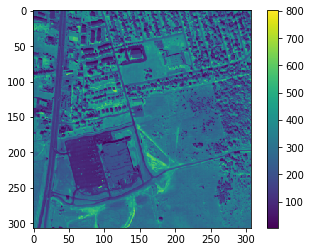

In [183]:
def getSpecBand(mat,band):
    bands = mat['SlectBands'].flatten().tolist()
    if band in bands:
        ind = bands.index(band)
        return mat['Y'][ind].reshape((mat['nRow'][0][0],mat['nCol'][0][0]))
    return False

def displaySpecBand(mat,band):
    res = getSpecBand(mat,band)
    if res.any() != False:
        plt.imshow(res)
        plt.colorbar()
    else:
        print("This band is not available")
        
displaySpecBand(mat,100)